In [1]:
"""
x = np.arange(0, 10)
y = np.exp(-x/3.0)
y[5] = np.nan
f = interpolate.interp1d(x, y, kind="nearest")

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew) 
plt.plot(x, y, 'o', xnew, ynew, '-')
"""

'\nx = np.arange(0, 10)\ny = np.exp(-x/3.0)\ny[5] = np.nan\nf = interpolate.interp1d(x, y, kind="nearest")\n\nxnew = np.arange(0, 9, 0.1)\nynew = f(xnew) \nplt.plot(x, y, \'o\', xnew, ynew, \'-\')\n'

In [2]:
import numpy as np
from tqdm.notebook import tqdm
from scipy import interpolate
import matplotlib.pyplot as plt

In [3]:
blanks = np.hstack(
    [np.arange(140, 155), np.arange(311, 326), np.arange(538, 553), 
     np.arange(740, 772), np.arange(911, 926), np.arange(1094, 1123),
     np.arange(1319, 1334), np.arange(1651, 1666), np.arange(1835, 1850), 
     np.arange(1988, 2003), np.arange(2167, 2182), 2326])

In [4]:
training_methods = ["dino", "supervised"] 
depth_list = [4, 8, 12]
num_models = 6
num_heads = 6
num_frames = 2327
num_sampling = 3883

In [5]:
time = np.linspace(0, 1.0, num_frames)
time_upsample = np.linspace(0, 1.0, num_sampling)

In [6]:
vit_gaze_pos_data = np.load("../preprocessed_data/vit_gaze_pos.npz", allow_pickle=True)

In [7]:
res_dict = {}
res_dict["info"] = ["num_models", "depth", "num_head+mean", "num_sampling", "xy"]
for tm in tqdm(training_methods):
    gaze_pos_tm = vit_gaze_pos_data[tm].item()
    res_dict[tm] = {}
    for depth in depth_list:
        print(tm, depth)
        gaze_pos_depth = gaze_pos_tm[str(depth)]
        #gaze_pos_depth[:, :, :, blanks, :] = np.nan
        print(gaze_pos_depth.shape)
        gaze_pos_upsample = np.zeros((num_models, depth, num_heads+1, num_sampling, 2))
        for trial_idx in tqdm(range(num_models)):
            for d in range(depth):
                for h in range(num_heads+1):
                    for i in range(2): # x, y
                        gp = gaze_pos_depth[trial_idx, d, h, :, i]
                        f = interpolate.interp1d(time, gp, kind="nearest")
                        gp_upsample = f(time_upsample) 
                        gaze_pos_upsample[trial_idx, d, h, :, i] = gp_upsample
        res_dict[tm][str(depth)] = gaze_pos_upsample

  0%|          | 0/2 [00:00<?, ?it/s]

dino 4
(6, 4, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

dino 8
(6, 8, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

dino 12
(6, 12, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

supervised 4
(6, 4, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

supervised 8
(6, 8, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

supervised 12
(6, 12, 7, 2327, 2)


  0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
save_dir = "../preprocessed_data/"
np.savez_compressed(f"{save_dir}/vit_gaze_pos_upsample.npz", **res_dict)

(0.0, 0.3)

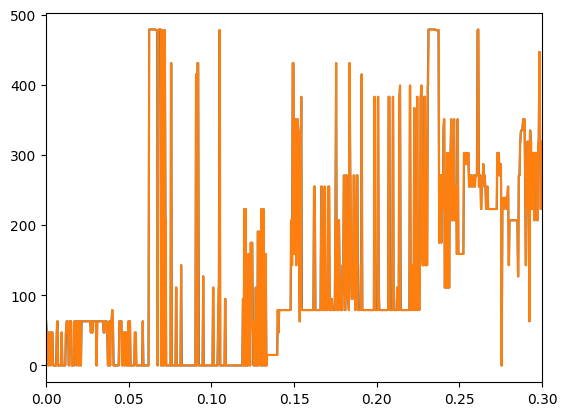

In [9]:
plt.plot(time, gp)
plt.plot(time_upsample, gp_upsample)
plt.xlim(0, 0.3)